# 데이터 전처리

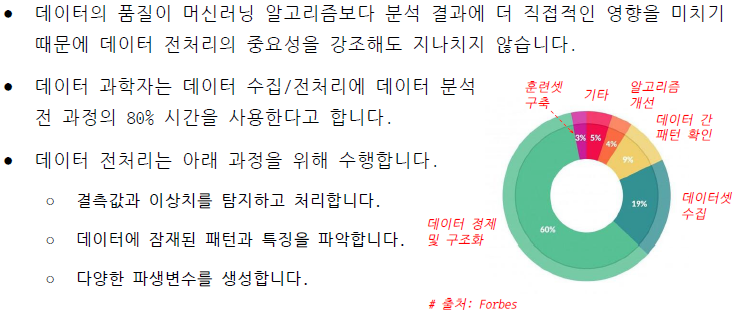

### 데이터 전처리 항목

### 실습 데이터셋 소개

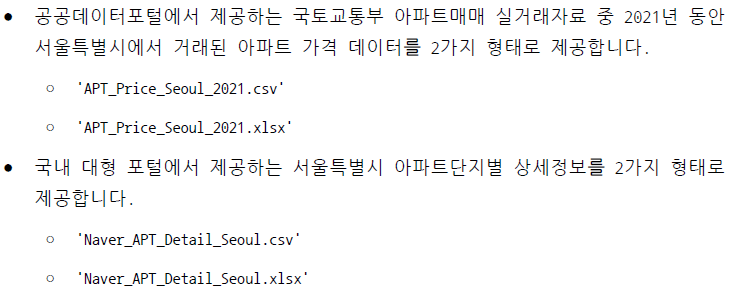

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import chardet
import numpy as np
import pandas as pd
import joblib

### 작업 경로 확인 및 변경

In [3]:
os.getcwd()

'D:\\python\\PythonBasic-main\\code'

In [7]:
os.chdir(path = '../data')

In [6]:
os.listdir()

['APT_List_Seoul_2021.csv',
 'APT_List_Seoul_2021.xlsx',
 'APT_List_Seoul_2021.z',
 'APT_Mean_Price_Dong_2021.xlsx',
 'APT_Price_Seoul_2021.csv',
 'APT_Price_Seoul_2021.xlsx',
 'KBO_Hitters_2021.csv',
 'KBO_Hitters_2021.xlsx',
 'Naver_APT_Detail_Seoul.csv',
 'Naver_APT_Detail_Seoul.xlsx']

###  xlsx 파일을 읽고 데이터프레임 생성

In [10]:
%time price = pd.read_excel(io = 'APT_Price_Seoul_2021.xlsx')
# 코드 앞에 %time을 추가하면 코드 실행 시간을 반환합니다.
# 약 5초 소요됩니다.

CPU times: total: 5.62 s
Wall time: 5.64 s


In [13]:
price.info() # 거래일의 자료형은 numpy.datetime64입니다. [참고] xlsx 파일은 셀서식을 유지합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43447 entries, 0 to 43446
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지역코드    43447 non-null  int64         
 1   아파트     43447 non-null  object        
 2   시도명     43447 non-null  object        
 3   시군구     43447 non-null  object        
 4   법정동     43447 non-null  object        
 5   지번      43433 non-null  object        
 6   거래일     43447 non-null  datetime64[ns]
 7   전용면적    43447 non-null  float64       
 8   층       43447 non-null  int64         
 9   거래금액    43447 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 3.3+ MB


In [14]:
price.head()

,지역코드,아파트,시도명,시군구,법정동,지번,거래일,전용면적,층,거래금액
0,11170,동아그린,서울특별시,용산구,이촌동,411,2021-01-01,43.020,11,"87,500"
1,11305,한원힐트리움수유,서울특별시,강북구,수유동,738,2021-01-01,27.390,5,"24,300"
2,11380,대림한숲(DMC이편한세상),서울특별시,은평구,수색동,415-1,2021-01-01,84.951,3,"77,000"
3,11380,동광갈현베르빌,서울특별시,은평구,갈현동,465-12,2021-01-01,84.997,8,"68,000"
4,11380,동광갈현베르빌,서울특별시,은평구,갈현동,465-12,2021-01-01,84.997,8,"68,000"


### csv 파일을 읽고 데이터프레임 생성

In [17]:
file = 'APT_Price_Seoul_2021.csv' # 가격 csv 파일명을 재사용할 수 있도록 변수에 할당합니다.

In [20]:
text = open(file = file, mode = 'rb').read() # csv 파일을 바이너리 모드로 읽습니다.
text[:100] 

b'\xec\xa7\x80\xec\x97\xad\xec\xbd\x94\xeb\x93\x9c,\xec\x95\x84\xed\x8c\x8c\xed\x8a\xb8,\xec\x8b\x9c\xeb\x8f\x84\xeb\xaa\x85,\xec\x8b\x9c\xea\xb5\xb0\xea\xb5\xac,\xeb\xb2\x95\xec\xa0\x95\xeb\x8f\x99,\xec\xa7\x80\xeb\xb2\x88,\xea\xb1\xb0\xeb\x9e\x98\xec\x9d\xbc,\xec\xa0\x84\xec\x9a\xa9\xeb\xa9\xb4\xec\xa0\x81,\xec\xb8\xb5,\xea\xb1\xb0\xeb\x9e\x98\xea\xb8\x88\xec\x95\xa1\n'

In [22]:
chardet.detect(text[:100]) # cav 파일의 문자 인코딩 방식을 확인합니다. [참고] csv 파일 용량이 크면 오래 걸리므로 일부만 확인합니다.

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [23]:
%time price = pd.read_csv(filepath_or_buffer = file, encoding = 'UTF-8')

CPU times: total: 109 ms
Wall time: 134 ms


In [25]:
price.dtypes # price의 열별 자료형을 확인합니다. 거래일과 거래금액의 자료형은 object입니다.
             # [참고] csv 파일은 날짜 데이터와 콤마를 포함하는 숫자를 문자열로 읽습니다.

지역코드      int64
아파트      object
시도명      object
시군구      object
법정동      object
지번       object
거래일      object
전용면적    float64
층         int64
거래금액     object
dtype: object

### [참고] xlsx 파일 VS csv 파일

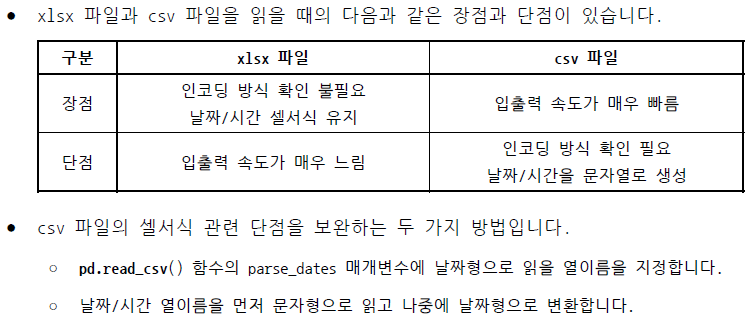

### [참고] csv 파일의 단점 해결

In [30]:
df = pd.read_csv(filepath_or_buffer = file,  # [참고] csv 파일 인코딩 방식이 'UTF-8'이면 encoding 매개변수를 생략할 수 있다.
                 parse_dates = ['거래일'], # 문자열이 날짜 기본형인 열이름을 지정합니다.
                                           # 'yyyy-mm-dd', 'yyyy/mm/dd', 'yyyy.mm.dd', 'yyyy mm dd', 'yyyymmdd' 등 5종
                 thousands = ',') # 천 단위 구분자를 문자열로 지정합니다. [참고] pd.read.excel() 함수에도 적용할 수 있습니다.

In [31]:
df.dtypes # df의 열별 자료형을 확인합ㄴ디ㅏ. 거래일은 numpy.datetime64, 거래금액은 numpy.int64입니다

지역코드             int64
아파트             object
시도명             object
시군구             object
법정동             object
지번              object
거래일     datetime64[ns]
전용면적           float64
층                int64
거래금액             int64
dtype: object

### 열이름으로 열 선택

In [32]:
# 열이름을 문자열 스칼라로 지정하면 시리즈로 반환합니다.
# [참고] 열이름을 리스트로 지정하면 데이터프레임으로 반환합니다.
price['지역코드']

0        11170
1        11305
2        11380
3        11380
4        11380
         ...  
43442    11590
43443    11650
43444    11680
43445    11680
43446    11740
Name: 지역코드, Length: 43447, dtype: int64

In [33]:
# 2개 이상의 열을 선택하려면 반드시 리스트로 지정해야 합니다.
# [참고] 열이름 순서를 변경하면 위치를 바꿔서 반환합니다.
price[['아파트', '지역코드']]

,아파트,지역코드
0,동아그린,11170
1,한원힐트리움수유,11305
2,대림한숲(DMC이편한세상),11380
3,동광갈현베르빌,11380
4,동광갈현베르빌,11380
...,...,...
43442,흑석동양아파트,11590
43443,삼풍아파트,11650
43444,래미안블레스티지,11680
43445,현대비젼21,11680


In [35]:
# [주의] loc 인덱서를 생략하면 에러를 반환합니다.
price.loc[:, '거래일':'거래금액']

,거래일,전용면적,층,거래금액
0,2021-01-01,43.020,11,"87,500"
1,2021-01-01,27.390,5,"24,300"
2,2021-01-01,84.951,3,"77,000"
3,2021-01-01,84.997,8,"68,000"
4,2021-01-01,84.997,8,"68,000"
...,...,...,...,...
43442,2021-12-31,84.991,1,"105,000"
43443,2021-12-31,79.470,9,"280,000"
43444,2021-12-31,84.940,16,"316,000"
43445,2021-12-31,32.650,18,"45,000"


In [36]:
price.loc[:, price.dtypes == int] # 자료형이 정수인 열만 선택합니다.

""
0
1
2
3
4
...
43442
43443
43444
43445


### 열이름으로 열 삭제

In [37]:
price.drop(columns = ['지역코드'])
# [주의] collumns 매개변수를 생략하면 반드시 axis = 1을 추가해야 합니다. 추가하지 않으면 인덱스에서 찾습니다.

,아파트,시도명,시군구,법정동,지번,거래일,전용면적,층,거래금액
0,동아그린,서울특별시,용산구,이촌동,411,2021-01-01,43.020,11,"87,500"
1,한원힐트리움수유,서울특별시,강북구,수유동,738,2021-01-01,27.390,5,"24,300"
2,대림한숲(DMC이편한세상),서울특별시,은평구,수색동,415-1,2021-01-01,84.951,3,"77,000"
3,동광갈현베르빌,서울특별시,은평구,갈현동,465-12,2021-01-01,84.997,8,"68,000"
4,동광갈현베르빌,서울특별시,은평구,갈현동,465-12,2021-01-01,84.997,8,"68,000"
...,...,...,...,...,...,...,...,...,...
43442,흑석동양아파트,서울특별시,동작구,흑석동,328,2021-12-31,84.991,1,"105,000"
43443,삼풍아파트,서울특별시,서초구,서초동,1685,2021-12-31,79.470,9,"280,000"
43444,래미안블레스티지,서울특별시,강남구,개포동,1280,2021-12-31,84.940,16,"316,000"
43445,현대비젼21,서울특별시,강남구,도곡동,467-19,2021-12-31,32.650,18,"45,000"


In [38]:
# price의 처음 5행을 출력합니다. price는 여전히 지역코드를 포함하고 있습니다.
price.head()

,지역코드,아파트,시도명,시군구,법정동,지번,거래일,전용면적,층,거래금액
0,11170,동아그린,서울특별시,용산구,이촌동,411,2021-01-01,43.020,11,"87,500"
1,11305,한원힐트리움수유,서울특별시,강북구,수유동,738,2021-01-01,27.390,5,"24,300"
2,11380,대림한숲(DMC이편한세상),서울특별시,은평구,수색동,415-1,2021-01-01,84.951,3,"77,000"
3,11380,동광갈현베르빌,서울특별시,은평구,갈현동,465-12,2021-01-01,84.997,8,"68,000"
4,11380,동광갈현베르빌,서울특별시,은평구,갈현동,465-12,2021-01-01,84.997,8,"68,000"


In [ ]:
price = price.drop(columns = ['지역코드'])
price.head() # price에 지역코드가 없습니다.

### 열이름 변경

In [39]:
# '기존 이름' : '새 이름'으로 설정합니다.
# [주의] columns 매개변수를 생략하면 안됩니다!
price.rename(columns = {'시도명': '시도', '시군구': '자치구'})

,지역코드,아파트,시도,자치구,법정동,지번,거래일,전용면적,층,거래금액
0,11170,동아그린,서울특별시,용산구,이촌동,411,2021-01-01,43.020,11,"87,500"
1,11305,한원힐트리움수유,서울특별시,강북구,수유동,738,2021-01-01,27.390,5,"24,300"
2,11380,대림한숲(DMC이편한세상),서울특별시,은평구,수색동,415-1,2021-01-01,84.951,3,"77,000"
3,11380,동광갈현베르빌,서울특별시,은평구,갈현동,465-12,2021-01-01,84.997,8,"68,000"
4,11380,동광갈현베르빌,서울특별시,은평구,갈현동,465-12,2021-01-01,84.997,8,"68,000"
...,...,...,...,...,...,...,...,...,...,...
43442,11590,흑석동양아파트,서울특별시,동작구,흑석동,328,2021-12-31,84.991,1,"105,000"
43443,11650,삼풍아파트,서울특별시,서초구,서초동,1685,2021-12-31,79.470,9,"280,000"
43444,11680,래미안블레스티지,서울특별시,강남구,개포동,1280,2021-12-31,84.940,16,"316,000"
43445,11680,현대비젼21,서울특별시,강남구,도곡동,467-19,2021-12-31,32.650,18,"45,000"


In [40]:
price.columns

Index(['지역코드', '아파트', '시도명', '시군구', '법정동', '지번', '거래일', '전용면적', '층', '거래금액'], dtype='object')

In [ ]:
# [주의] 데이터프레임의 열이름과 원소 개수가 같은 리스트를 지정해야 합니다.
price.columns = ['아파트', '시도', '자치구', '읍면동', '지번', 
                 '거래일', '전용면적', '층', '거래금액']
price.head() # 열이름이 변경되었습니다.

### 열별 자료형 변환

In [41]:
price['거래금액'] = price['거래금액'].str.replace(pat = ',', repl = '')
# [참고] 시리즈,str에 문자열을 처리하는 다양한 함수가 있습니다.

In [42]:
price['거래금액'] = price['거래금액'].astype(dtype = float)
price.dtypes # price의 열별 자료형을 확인합니다. 거래금액을 numpy.float64로 변환했습니다.

지역코드      int64
아파트      object
시도명      object
시군구      object
법정동      object
지번       object
거래일      object
전용면적    float64
층         int64
거래금액    float64
dtype: object

In [43]:
price = price.astype(dtype = {'거래일': np.datetime64, '층': float})
price.dtypes # 거래일을 numpy.datetime64, 층을 numpy.float64로 변환했습니다.

지역코드             int64
아파트             object
시도명             object
시군구             object
법정동             object
지번              object
거래일     datetime64[ns]
전용면적           float64
층              float64
거래금액           float64
dtype: object

In [ ]:
# 정수형으로 변환할 열이름으로 리스트를 생성합니다.
cols = ['층', '거래금액']

In [ ]:
price[cols] = price[cols].astype(dtype = int) # 선택한 열의 자료형을 일괄 변환합니다.
price.dtypes # 층과 거래금액을 numpy.int64로 변환했습니다.

### [참고] 문자열을 날짜형으로 변환

In [44]:
birth = pd.Series(data = ['2000년 1월 1일'])
birth

0    2000년 1월 1일
dtype: object

In [45]:
birth = pd.to_datetime(arg = birth, format = '%Y년 %m월 %d일')
birth.iloc[0] # birth의 0번 인덱스 원소를 출력합니니다
              # [참고] 날짜 시간 데이터는 '년-월-일 시:분:초, 마이크로초' 형태로 출력합니다.

Timestamp('2000-01-01 00:00:00')

### [참고] 날짜/시간 관련 주요 포맷

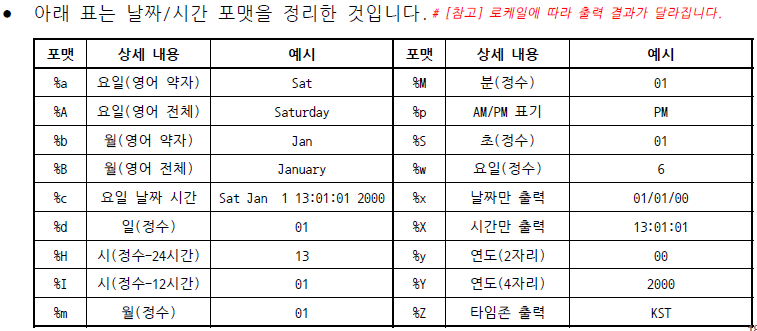

### [참고] 날짜 시간 데이터 연산

In [47]:
today = pd.Timestamp.today()
today.timestamp() # 날짜 시간 데이터의 tumestamp() 함수를 실행하면 Origin(1970-01-01 00:00:00)부터
                  # 누적된 초를 소수점 여섯째 자리 마이크로초(백만 분의 1초) 단위로 반환합니다.

1665298266.801743

In [ ]:
# 태어나서 현재까지 살아온 기간을 dtGap에 할당합니다.
dtGap = today - birth.iloc[0]

In [48]:
# dtGap에서 경과일수를 출력합니다.
dtGap.days

NameError: name 'dtGap' is not defined

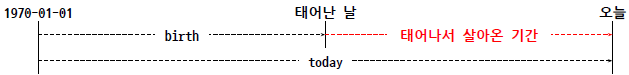

### [참고] 날짜 분해 함수

In [ ]:
# 거래일에서 년(year)을 정수형 시리즈로 반환합니다.
price['거래일'].dt.year

In [ ]:
# 거래일에서 월(month)을 정수형 시리즈로 반환합니다.
price['거래일'].dt.month

In [49]:
# 거래일에서 일(day)을 정수형 시리즈로 반환합니다.
price['거래일'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
43442    31
43443    31
43444    31
43445    31
43446    31
Name: 거래일, Length: 43447, dtype: int64

In [ ]:
# 거래일에서 영문 요일을 문자형 시리즈로 반환합니다.
price['거래일'].dt.day_name()

In [ ]:
# 거래일에서 한글 요일을 문자형 시리즈로 반환합니다.
price['거래일'].dt.day_name(locale = 'ko_KR')

### 조건에 맞는 행 선택: 연속형 변수

In [50]:
df1 = price[price['거래금액'] >= 1000000] # [참고] 불리언 인덱싱으로 행을 선택할 때 loc인덱서를 생략할 수 있습니다.
df1.head() # df1의 처음 5행을 출력합니다. [참고] 행이름이 0부터 시작하지 않습니다.

,지역코드,아파트,시도명,시군구,법정동,지번,거래일,전용면적,층,거래금액
10512,11680,PH129,서울특별시,강남구,청담동,129,2021-03-04,273.96,14.0,1150000.0
10513,11680,PH129,서울특별시,강남구,청담동,129,2021-03-04,273.96,14.0,1150000.0
27790,11680,PH129,서울특별시,강남구,청담동,129,2021-07-07,273.96,6.0,1000000.0
31863,11170,파르크한남,서울특별시,용산구,한남동,410,2021-08-04,268.67,3.0,1000000.0
36848,11170,파르크한남,서울특별시,용산구,한남동,410,2021-09-09,268.67,2.0,1080000.0


In [ ]:
df2 = price[(price['거래금액'] < 1000000) & (price['층'] >= 60)]
# 시리즈로 논리곱 연산을 실행할 때 논리 연산자를 사용하면 에러가 발생하며 비트 연산자를 대신 사용해야 합니다.
# [주의] 비트 연산자 앞뒤 코드를 반드시 소괄호로 감싸야 합니다.
df2.head()

### [참고] 시리즈의 비교 연산 함수

In [ ]:
# 층이 60 초과면 True, 아니면 False인 부울형 시리즈를 반환합니다.
price['층'].gt(60).sum()

In [ ]:
# 층이 60 이상이면 True, 아니면 False인 부울형 시리즈를 반환합니다.
price['층'].ge(60).sum()

In [ ]:
# 층이 60 미만이면 True, 아니면 False인 부울형 시리즈를 반환합니다.
price['층'].lt(60).sum()

In [ ]:
# 층이 60 이하이면 True, 아니면 False인 부울형 시리즈를 반환합니다.
price['층'].le(60).sum()

In [ ]:
# 층이 60이면 True, 60이 아니면 False인 부울형 시리즈를 반환합니다.
price['층'].eq(60).sum()

In [ ]:
# 층이 60이 아니면 True, 60이면 False인 부울형 시리즈를 반환합니다.
price['층'].ne(60).sum()

In [ ]:
# 비교 연산 함수는 시리즈이므로 소괄호로 감싸지 않아도 됩니다.
price['거래금액'].lt(1000000) & price['층'].ge(60)

### 조건에 맞는 행 선택: 범주형 변수

In [ ]:
# 자치구가 '강남구'인 행을 선택합니다.
price[price['자치구'].eq('강남구')]

In [ ]:
# 자치구가 '강남구' 또는 '서초구'인 행을 선택합니다.
price[price['자치구'].eq('강남구') | price['자치구'].eq('서초구')]

In [ ]:
# isin() 함수는 시리즈 원소가 리스트에 있으면 True, 없으면 False를 반환합니다.
price[price['자치구'].isin(values = ['강남구', '서초구'])]

In [ ]:
# str.contains() 함수는 원소에 패턴이 있으면 True, 없으면 False를 반환합니다.
price[price['자치구'].str.contains(pat = '강남|서초')]

### [참고] 시리즈를 문자열로 처리하는 주요 함수

In [ ]:
# 실습용 시리즈를 생성합니다.
addr = pd.Series(data = ['서울특별시 강남구', '경기도 성남시 분당구'])

In [ ]:
# 문자열(원소)을 지정한 패턴으로 분리한 결과를 데이터프레임으로 반환합니다.
addr.str.split(pat = ' ', expand = True)

In [ ]:
# 문자열(원소)마다 지정한 패턴이 있으면 시작 인덱스를 반환합니다.
# [참고] 지정한 패턴이 없으면 -1을 반환합니다.
addr.str.find(sub = '시')

In [ ]:
# 문자열(원소)마다 지정한 패턴을 변경합니다.
addr.str.replace(pat = ' ', repl = '')

In [ ]:
# 문자열(원소)을 지정한 인덱스로 자릅니다.
addr.str.slice(start = 0, stop = 2)

In [ ]:
# 문자열(원소)마다 지정한 패턴에 해당하는 문자열을 추출합니다.
# [주의] 패턴을 소괄호로 감싸야 합니다.
addr.str.extract(pat = '([가-힣]+구)')

### 행이름으로 행 삭제

In [ ]:
# df1의 처음 5행을 출력합니다.
df1.head()

In [ ]:
# 삭제할 행이름을 drop() 함수의 index 매개변수에 리스트로 지정합니다.
# [주의] 행이름에 없는 값을 지정하면 에러를 반환합니다.
df1.drop(index = [10512, 10513])

In [ ]:
# 행이름 리스트 대신 인덱스로 지정할 수 있습니다.
df1.drop(index = df1.index[0:2])

### 행이름 초기화

In [ ]:
# 행이름을 초기화한 결과를 출력합니다.
# [참고] drop = True를 추가하지 않으면 기존 행이름을 열로 추가합니다.
df1.reset_index(drop = True)

In [ ]:
# 특정 열을 인덱스로 지정합니다.
df1 = df1.set_index(keys = '아파트')
df1.head() # 아파트를 행이름으로 설정하고 열에서 삭제합니다.

In [ ]:
# 행이름을 초기화하면서 기존 행이름을 열로 추가합니다.
df1 = df1.reset_index()
df1.head() # 기존 행이름이었던 아파트를 열로 추가합니다.

### 결측값 처리: 단순대체

In [ ]:
# 데이터프레임의 셀 값별 결측값 여부를 반환합니다.
price.isna()
# isna() 함수는 결측값 여부를 True 또는 false로 반환합니다.
# [참고] isnull() 함수는 isna() 함수의 alias이므로 같은 동작을 수행합니다.

In [ ]:
# 데이터프레임의 열별 결측값 개수를 계산합니다.
price.isna().sum() # 지번에 결측값이 14개 있습니다.

In [ ]:
# 지번이 결측값인 행을 선택합니다.
price[price['지번'].isna()]
# [참고] 결측값의 원본을 탐색하면 서초포레스타2단지의 지번은 384,
# 힐스테이트 서초 젠트리스의 지번은 557입니다.

In [ ]:
# 지번이 결측값인 행에서 결측값을 빈 문자열로 대체한 결과를 반환합니다.
price[price['지번'].isna()].fillna(value = '')

### [참고] 결측값을 이전 셀 값으로 채우기

In [ ]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
os.listdir()

In [ ]:
# 법정동별 평균 거래금액 xlsx 파일을 읽고 데이터프레임을 생성합니다.
meanPrice = pd.read_excel(io = 'APT_Mean_Price_Dong_2021.xlsx')

In [ ]:
# meanPrice를 출력합니다.
# [참고] xlsx에서 병합한 셀은 처음 값만 제대로 읽고 나머지는 결측값으로 대체합니다.
meanPrice

In [51]:
# 자치구에 있는 결측값을 이전 셀 값으로 채웁니다.
# [참고] method 매개변수에 'bfill'을 지정하면 결측값을 이후 셀 값으로 채웁니다.
meanPrice.fillna(method = 'ffill')

NameError: name 'meanPrice' is not defined

### [참고] 데이터프레임에서 결측값이 있는 행 삭제

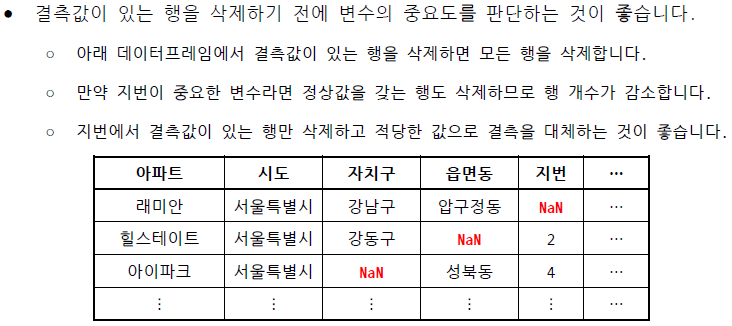

### 결측값 처리: 행 삭제

In [ ]:
# 데이터프레임에서 결측값이 있는 모든 행을 삭제하고 행 개수를 확인합니다.
price.dropna().shape[0]
# [참고] dropna() 함수의 subset 매개변수에 일부 열이름을 지정하면 해당 열에서 결측값이 있는 행을 삭제합니다.

In [ ]:
# 지번에서 결측값이 있는 행을 선택하고 행 개수를 확인합니다.
price[price['지번'].isna()].shape[0]

In [ ]:
# 지번에서 결측값이 없는 행을 선택하고 행 개수를 확인합니다.
price[price['지번'].notna()].shape[0]
# notna() 함수는 결측값이 아니면 True, 결측값이면 False를 반환합니다.

In [ ]:
# 지번에서 결측값이 아닌 행을 선택하고 price에 재할당합니다.
price = price[price['지번'].notna()]
# [참조] notna() 함수 대신 isna() 함수 실행 결과를 반전하도록 ~연산자를 사용할 수 있습니다.

### 파생변수 생성 : 연속형 변수

In [ ]:
# 거래금액을 전용면적으로 나누고 3.3을 곱한 평당금액을 생성합니다.
price['평당금액'] = price['거래금액'] / price['전용면적'] * 3.3
price.head()
# [참고] 데이터프레임에 없는 열이름으로 시리즈를 생성하면 데이터프레임의 가장 오른쪽에 해당 열이름을 추가합니다.

In [ ]:
# 거래금액을 10000으로 나누면 단위가 만원에서 억원으로 바뀝니다.
price['거래금액'] = price['거래금액'] / 10000

In [ ]:
# pandas 옵션에서 실수를 출력하는 소수점 자리수를 3으로 설정합니다.
pd.options.display.precision = 3
price.head() # [참고] 평당금액을 소수점 셋째 자리까지 출력합니다.

### 파생변수 생성 : 범주형 변수

In [ ]:
# 평당금액이 5000 이상이면 True, 아니면 False인 원소를 갖는 부울형 시리즈를 locs에 할당합니다.
locs = price['평당금액'].ge(5000)

In [ ]:
# np.where() 함수는 조건이 True일 때 두 번째 인수, False일 때 세 번째 인수를 반환합니다.
np.where(locs, '5천 이상', '5천 미만')

In [ ]:
# 평당금액을 '5천 이상', '5천 미만'으로 구분한 금액구분을 생성합니다.
price['금액구분'] = np.where(locs, '5천 이상', '5천 미만')
price.head() # [참고] np.where() 함수에 조건만 지정하면 True인 인덱스를 반환합니다.

### [참고] pandas에서 추천하는 코딩 방식

In [ ]:
# price를 깊은 복사한 imsi를 생성합니다.
imsi = price.copy()
# [주의] 데이터프레임을 복사할 때 copy()를 생략하면 얕은 복사가 됩니다.
# 얕은 복사는 같은 객체를 두 개의 변수가 함께 가리키는 것을 의미합니다.

In [ ]:
# 평당금액이 5000 이상인 행의 새 변수(금액구분2)에 '5천 이상'을 할당합니다.
imsi.loc[imsi['평당금액'].ge(5000), '금액구분2'] = '5천 이상'
imsi.head()
# 오른쪽에 금액구분2를 추가하고 평당금액이 5000 이상이면 '5천 이상', 아니면 결측값으로
#채웁니다. 이어서 아래 코드를 실행하면 결측값을 '5천 미만'으로 채웁니다.

In [ ]:
# 평당금액이 5000 미만인 행의 새 변수(금액구분2)에 '5천 미만'을 할당합니다.
imsi.loc[imsi['평당금액'].lt(5000), '금액구분2'] = '5천 미만'
imsi.head() # 금액구분2에 결측값이 없습니다.

### [참고] 구간화 함수

In [ ]:
# 연속형 변수를 세 개 이상으로 분리할 때 np.where() 함수를 중첩합니다.
np.where(price['평당금액'].ge(10000), 
         '1억 이상',  # 첫 번째 조건을 만족하면 '1억 이상'을 반환하고, 그렇지 않으면 두 번째 조건만족 여부를 확인합니다.
         np.where(price['평당금액'].ge(5000), 
                  '5천 이상',  # 두 번째 조건 만족 여부에 따라 '5천 이상' 또는 '5천 미만'을 반환합니다.
                  '5천 미만')) # 코드를 구성하는 요소는 단순하지만 가독성이 좋지 않습니다.

In [ ]:
# 연속형 변수를 세 개 이상으로 분리할 때 np.select() 함수를 사용합니다.
np.select(condlist = [price['평당금액'].ge(10000),
                      price['평당금액'].ge(5000),
                      price['평당금액'].lt(5000)], 
          choicelist = ['1억 이상', '5천 이상', '5천 미만']) # 조건에 맞는 값을 반환합니다.

### 파생변수 생성: 문자형 변수 결합

In [ ]:
# 여러 문자형 변수를 + 연산자로 결합합니다.
price['주소'] = price['시도'] + ' ' + price['자치구'] + ' ' + \
                price['읍면동'] + ' ' + price['지번'] # 한줄로 끝나지 않는 코드에 백슬래쉬를 추가합니다.
price.head()

In [ ]:
# 여러 문자형 열이름으로 리스트를 생성합니다.
cols = ['시도', '자치구', '읍면동', '지번']

In [ ]:
# 데이터프레임의 행(시리즈)별로 문자열을 결합하는 함수를 반복 실행합니다.
price[cols].apply(func = lambda x: ' '.join(x), axis = 1)

### [참고] 같은 함수 반복 실행 실습

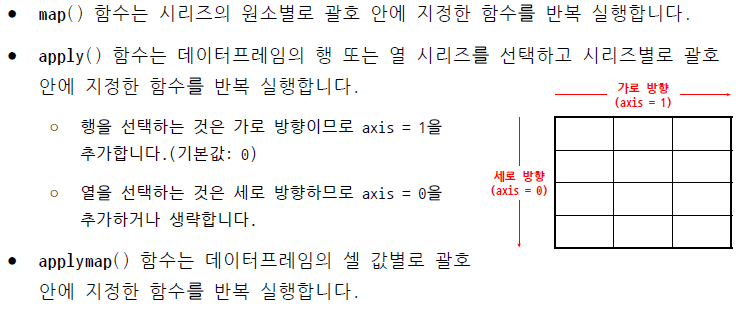

In [ ]:
# 아파트(시리즈)의 원소(문자열)별 글자수를 반환합니다.
price['아파트'].map(arg = len)

In [ ]:
# 데이터프레임의 열(시리즈)별 원소 개수를 반환합니다.
price[cols].apply(func = len, axis = 0)

In [ ]:
# 데이터프레임의 행(시리즈)별 원소 개수를 반환합니다.
price[cols].apply(func = len, axis = 1)

In [ ]:
# 데이터프레임의 셀 값(문자열)별 글자수를 반환합니다.
price[cols].applymap(func = len)

### 데이터프레임 정렬

In [ ]:
# 층을 오름차순 정렬합니다.
# [참고] ascending 매개변수에 전달하는 인수의 기본값은 True입니다.
price['층'].sort_values()

In [ ]:
# 층을 내림차순 정렬합니다.
price['층'].sort_values(ascending = False)

In [ ]:
# price를 층으로 오름차순 정렬합니다.
price.sort_values(by = ['층'])

In [52]:
# price를 층으로 내림차순 정렬합니다.
price.sort_values(by = ['층'], ascending = False)

,지역코드,아파트,시도명,시군구,법정동,지번,거래일,전용면적,층,거래금액
25949,11680,타워팰리스3,서울특별시,강남구,도곡동,467-29,2021-06-24,214.9670,66.0,458000.0
38720,11680,타워팰리스1,서울특별시,강남구,도곡동,467,2021-09-30,222.4800,64.0,482500.0
7859,11680,타워팰리스3,서울특별시,강남구,도곡동,467-29,2021-02-10,214.9670,64.0,460000.0
18269,11680,타워팰리스3,서울특별시,강남구,도곡동,467-29,2021-05-04,244.2240,63.0,535000.0
25446,11680,타워팰리스3,서울특별시,강남구,도곡동,467-29,2021-06-20,214.9670,63.0,450000.0
...,...,...,...,...,...,...,...,...,...,...
41073,11380,은평뉴타운우물골(두산위브7단지),서울특별시,은평구,진관동,84,2021-11-02,134.7500,-1.0,148000.0
15493,11590,삼성그린101동,서울특별시,동작구,사당동,180-26,2021-04-15,67.1500,-1.0,34700.0
11369,11140,수산타운(2차),서울특별시,중구,신당동,432-2006,2021-03-11,32.8600,-1.0,9500.0
19074,11590,아크로리버하임,서울특별시,동작구,흑석동,341,2021-05-09,84.9108,-3.0,204000.0


In [ ]:
# price를 층과 거래금액으로 내림차순 정렬합니다.
price.sort_values(by = ['층', '거래금액'], ascending = False)

In [ ]:
# price를 층은 내림차순, 거래금액은 오름차순 정렬합니다.
price.sort_values(by = ['층', '거래금액'], ascending = [False, True])

### 집계함수로 데이터 요약

In [ ]:
# 거래금액에서 결측값을 제외한 빈도수를 반환합니다.
price['거래금액'].count()

In [ ]:
# 거래금액의 평균을 반환합니다.
price['거래금액'].mean()

In [ ]:
# 거래금액의 표준편차를 반환합니다.
price['거래금액'].std()

In [ ]:
# 거래금액의 최솟값을 반환합니다.
price['거래금액'].min()

In [ ]:
# 거래금액의 최댓값을 반환합니다.
price['거래금액'].max()

In [ ]:
# 거래금액의 다양한 기술통계량을 반환합니다.
price['거래금액'].describe()

### 범주별 집계함수로 데이터 요약

In [ ]:
# 자치구별 거래금액에서 결측값을 제외한 빈도수를 반환합니다.
price.groupby(by = ['자치구'])['거래금액'].count()

In [ ]:
# 자치구별 거래금액의 평균을 반환합니다.
price.groupby(by = ['자치구'])['거래금액'].mean()

In [ ]:
# 자치구별 거래금액의 표준편차를 반환합니다.
price.groupby(by = ['자치구'])['거래금액'].std()

In [ ]:
# 자치구별 거래금액의 최솟값을 반환합니다.
price.groupby(by = ['자치구'])['거래금액'].min()

In [ ]:
# 자치구별 거래금액의 최댓값을 반환합니다.
price.groupby(by = ['자치구'])['거래금액'].max()

In [ ]:
# 자치구별 거래금액의 다양한 기술통계량을 반환합니다.
price.groupby(by = ['자치구'])['거래금액'].describe()

### 범주형 변수의 빈도수/상대도수 확인

In [ ]:
# 자치구에서 중복을 제거한 원소를 반환합니다.
price['자치구'].unique()

In [53]:
# 자치구에서 중복을 제거한 원소 개수를 반환합니다.
price['자치구'].nunique()

KeyError: '자치구'

In [ ]:
# 자치구별 빈도수를 내림차순 정렬한 결과를 반환합니다.
price['자치구'].value_counts()

In [ ]:
# 자치구별 빈도수를 오름차순 정렬한 결과를 반환합니다.
price['자치구'].value_counts(ascending = True)

In [ ]:
# 자치구별 빈도수를 시리즈 인덱스로 오름차순 정렬한 결과를 반환합니다.
price['자치구'].value_counts().sort_index()

In [54]:
# 자치구별 상대도수를 내림차순 정렬한 결과를 반환합니다.
price['자치구'].value_counts(normalize = True)

KeyError: '자치구'

### 데이터프레임의 2가지 형태

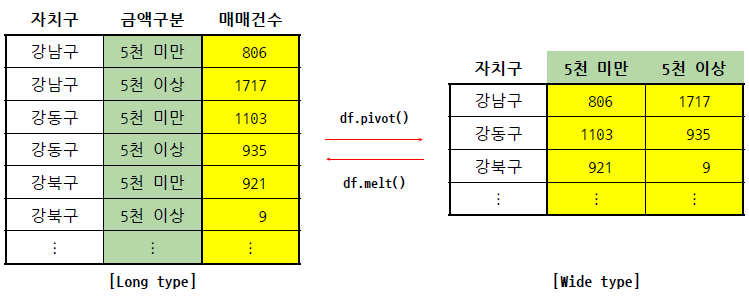

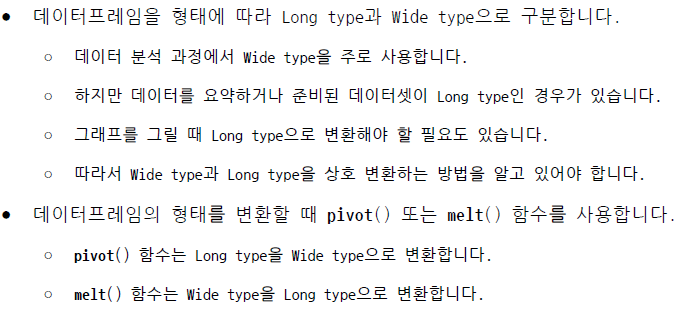

### Long type 데이터프레임 생성

In [ ]:
# 두 범주형 변수명으로 리스트를 생성합니다.
cols = ['자치구', '금액구분']

In [55]:
# 두 범주형 변수의 빈도수로 Long type 데이터프레임을 생성합니다.
elong = price.groupby(by = cols)[['평당금액']].count()
elong.head()
# [참고] elong은 자치구와 금액구분을 인덱스(행이름)로 갖는 데이터프레임입니다.
# 25개 자치구마다 2종의 금액구분이 있으므로 elong의 행 개수는 50입니다.

NameError: name 'cols' is not defined

In [56]:
# elong의 행이름을 초기화하고 기존 행이름을 열로 추가합니다.
elong = elong.reset_index()
elong.head()
# [참고] elong의 행이름을 초기화하면 50행, 3열인 데이터프레임으로 변환합니다.
# 마지막 열이름은 빈도수이므로 아래 코드를 실행하여 '매매건수'를 변경하는 것이 좋습니다.

NameError: name 'elong' is not defined

In [ ]:
# elong의 일부 열이름을 변경합니다.
elong = elong.rename(columns = {'평당금액': '매매건수'})

### Long type을 Wide type으로 변환

In [ ]:
# Long type을 Wide type으로 변환합니다.
widen = elong.pivot(index = '자치구',  # index로 적용할 열이름을 지정합니다.
                    columns = '금액구분',  # Wide type의 열이름으로 적용할 Long type의 열이름을 지정합니다.
                    values = '매매건수') # Wide type의 값으로 채울 Long type의 열이름을 지정합니다.
widen.head() # [참고] widen은 25개 자치구별로 '5천 미만'과 '5천 이상'의 열을 갖습니다(25행)

In [ ]:
# widen의 행이름을 출력합니다.
# [참고] 인덱스(행이름)에 name 속성이 있고, 속성값은 '자치구'입니다.
widen.index

In [ ]:
# 인덱스(행이름)의 name을 출력합니다.
widen.index.name
# [참고] widen의 행이름을 초기화하면 인덱스 name을 열이름으로 설정합니다.

### widen 행이름 초기화

In [ ]:
# widen의 행이름을 초기화하고 기존 행이름을 열로 추가합니다.
widen = widen.reset_index() # widen의 행이름을 열에 추가하도록 drop = True를 생략합니다.
                            # [참고] 행이름이 name 속성값인 '자치구'를 열이름으로 설정합니다.
widen.head() # widen의 처음 5행을 출력합니다.
             # [참고] 행이름 위에 '금액구분'을 출력하는데, 이것은 열이름의 name입니다.

In [ ]:
# widen의 열이름을 출력합니다.
# [참고] 컬럼명(열이름)에 name 속성이 있고, 속성값은 '금액구분'입니다.
widen.columns

In [ ]:
# 컬럼명(열이름)의 name을 출력합니다.
widen.columns.name

In [ ]:
# 컬럼명(열이름)의 name에 빈 문자열을 할당합니다.
widen.columns.name = ''
widen.head() # widen의 처음 5행을 출력합니다.
             # [참고] 행이름 위에 아무것도 출력하지 않습니다.

### Wide type을 Long type으로 변환

In [ ]:
# Wide type을 Long type으로 변환합니다.
widen.melt(id_vars = '자치구', # id_vars 매개변수에 맨 왼쪽에 놓을 열이름을 지정하고, value_vars 매개변수에는 세로로 늘일 열이름을 지정합니다.
           value_vars = ['5천 미만', '5천 이상'], 
           var_name = '금액종류', # value_vars 매개변수에 지정한 열이름을 원소로 갖는 새 열이름을 지정합니다.
           value_name = '거래건수') \ # value_vars 매개변수에 지정한 열의 값을 원소로 갖는 새 열이름을 지정합니다.
     .sort_values(by = ['자치구', '금액종류']) \
     .reset_index(drop = True) \ # [참고] 여러 중로 작성하려면 마지막에 \ 기호를 추가합니다.
                                  # [주의] \ 기호 뒤에 공백 포함 아무것도 입력하면 안됩니다!
     .head()

### 피벗 테이블 생성

In [ ]:
# 두 범주형 변수로 연속형 변수를 요약한 피벗 테이블을 생성합니다.
pd.pivot_table(data = price,  # 데이터프레임을 지정합니다. [주의] data 매개변수를 생략하면 에러를 반환합니다.
               values = '평당금액', # 집계함수에 적용할 연속형 열이름을 지정합니다.
               index = '자치구',  # 행이름에 적용할 열이름을 지정합니다.
               columns = '금액구분',  # 열이름에 적용할 열이름을 지정합니다.
               aggfunc = np.mean)  # 집계함수를 np.통계함수 또는 문자열로 지정합니다.
                                   # [참고] 함수가 두 개 이상이면 리스트로 지정합니다.

### 교차 테이블 생성

In [ ]:
# 두 범주형 변수의 빈도수/상대도수를 원소로 갖는 교차 테이블을 생성합니다.
pd.crosstab(index = price['자치구'], # 행이름에 적용할 시리즈를 지정합니다. [참고] 입력변수(원인)를 지정합니다.
            columns = price['금액구분'],  # 열이름에 적용할 시리즈를 지정합니다. [참고] 목표변수(결과)를 지정합니다.
            normalize = 'index', # normalize 매개변수를 추가하면 상대도수를 반환합니다. [참고] 'index'는 행별, 'columns'는 열별 상대도수입니다.
            margins = True, # 행과 열 합계를 추가합니다.
            margins_name = '합계') # 행과 열 합계의 이름을 지정합니다 (기본값: 'All')

### 데이터프레임 결합

In [ ]:
# 두 데이터프레임의 열이름이 순서까지 정확하게 같은지 확인합니다.
# 두 데이터프레임의 열이름이 같으므로 True입니다.
# [참고] 순서만 달라도 False를 반환합니다.
df1.columns.equals(other = df2.columns)

In [ ]:
# 열이름이 같은 두 데이터프레임을 행(세로) 방향으로 결합합니다.
pd.concat(objs = [df1, df2]) # [참고] 두 데이터프레임의 기존 행이름을 유지합니다.

In [ ]:
# 두 데이터프레임을 세로로 결합하고 행이름을 초기화합니다.
pd.concat(objs = [df1, df2], ignore_index = True)

In [ ]:
# df2의 일부 열이름을 변경합니다.
df2 = df2.rename(columns = {'아파트': '아파트명'})

In [ ]:
# 두 데이터프레임의 열이름이 순서까지 정확하게 같은지 확인합니다.
df1.columns.equals(other = df2.columns) # 두 데이터프레임 열이름이 서로 다르므로 False를 반환합니다.

In [ ]:
# 열이름이 다른 두 데이터프레임을 행(세로) 방향으로 결합합니다.
pd.concat(objs = [df1, df2], ignore_index = True) # [참고] 열이름이 서로 다른 셀 값을 결측값을 채웁니다.

In [ ]:
# 두 데이터프레임을 열(가로) 방향으로 결합합니다.
pd.concat(objs = [df1, df2], axis = 1) # [참고] 행이름이 같은 행을 결합하고 행이름이 서로 다른 셀 값을 결측값으로 채웁니다.

In [ ]:
# df2의 행이름을 초기화합니다.
df2 = df2.reset_index(drop = True)

In [57]:
# 행이름을 초기화한 두 데이터프레임을 열(가로) 방향으로 결합합니다.
pd.concat(objs = [df1, df2], axis = 1) # 행이름이 같은 행에는 결측값이 없고 행이름이 서로 다른 행에는 결측값이 있습니다.

NameError: name 'df2' is not defined

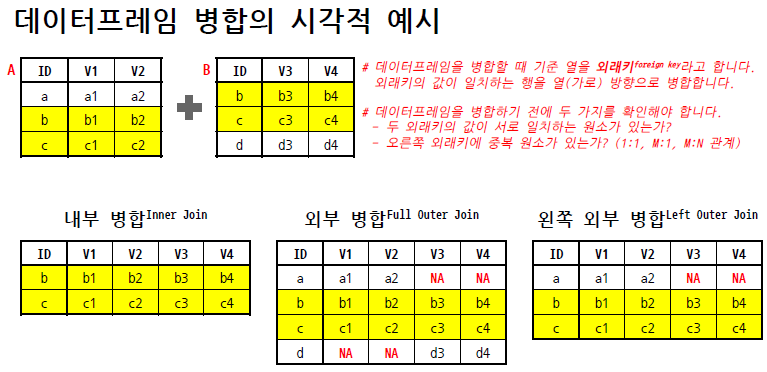

### 병합 데이터셋 준비

In [ ]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
os.listdir()

In [ ]:
# 상세정보 xlsx 파일을 읽고 데이터프레임을 생성합니다.
detail = pd.read_excel(io = 'Naver_APT_Detail_Seoul.xlsx')

In [ ]:
# detail의 정보를 확인합니다.
detail.info()

In [ ]:
# detail의 처음 5행을 출력합니다.
detail.head()

### 외래키 확인 및 전처리

In [ ]:
# 두 데이터프레임의 외래키에서 일치하는 원소 개수를 확인합니다.
len(set(price['주소']) & set(detail['지번주소']))

In [ ]:
# price의 주소를 출력합니다.
price['주소'].head() # price의 주소를 출력합니다. '서울특별시'로 시작합니다.

In [ ]:
# detail의 지번주소를 출력합니다.
detail['지번주소'].head() # detail의 지번주소를 출력합니다. '서울시'로 시작합니다.

In [ ]:
# price의 주소에서 '특별'을 삭제합니다.
price['주소'] = price['주소'].str.replace(pat = '특별', repl = '')

In [ ]:
# 외래키에서 일치하는 원소 개수를 다시 확인합니다.
len(set(price['주소']) & set(detail['지번주소']))

### [참고] 표본 추출 및 시드 고정

In [ ]:
# 이번 주 로또 번호를 출력합니다. 마음에 들 때까지 여러 번 반복해보세요.
np.random.choice(a = range(1, 46), size = 6, replace = False)

In [ ]:
# 시드를 고정하면 항상 재현 가능한(reproducible) 결과를 얻습니다.
#  - 시드는 무작위 값을 추출하기 전에 설정하는 초깃값입니다.
#  - 실제로는 무작위 값 추출 알고리즘을 통해 무작위로 보이는 값을 추출합니다.
np.random.seed(seed = 1)
np.random.choice(a = range(1, 46), size = 6, replace = False)

In [58]:
# 모집단(1~45의 정수)에서 6개 표본을 비복원추출하는 코드를 10번 반복합니다.
for i in range(10):
    np.random.seed(seed = 1)
    lotto = np.random.choice(a = range(1, 46), size = 6, replace = False)
    lotto.sort()
    print(lotto)

[ 3  4 22 23 31 42]
[ 3  4 22 23 31 42]
[ 3  4 22 23 31 42]
[ 3  4 22 23 31 42]
[ 3  4 22 23 31 42]
[ 3  4 22 23 31 42]
[ 3  4 22 23 31 42]
[ 3  4 22 23 31 42]
[ 3  4 22 23 31 42]
[ 3  4 22 23 31 42]


### [참고] 비복원추출 반복 실행

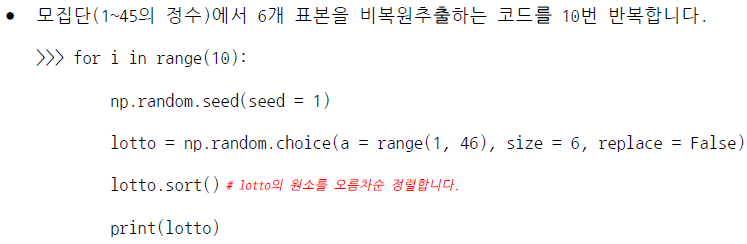

### [참고] 복원추출

In [ ]:
# 시드를 고정합니다.
np.random.seed(seed = 2)

In [ ]:
# 1~5의 정수에서 3개를 복원추출합니다.
nums = np.random.choice(a = range(1, 6), size = 3)

In [ ]:
# nums를 시리즈로 변환합니다.
nums = pd.Series(data = nums)
nums # [참고] 시리즈에는 원소의 중복 여부를 확인하는 duplicated() 함수가 있습니다.

### [참고] 중복 원소 확인 함수

In [ ]:
# 순방향으로 원소 중복 여부를 True/False로 반환합니다.
# [참고] keep 매개변수에 중복일 때 선택할 순소를 지정합니다.(기본값:'first')
nums.duplicated()

In [ ]:
# 역방향으로 원소 중복 여부를 True/False로 반환합니다.
nums.duplicated(keep = 'last')

In [59]:
# 모든 중복 원소를 True로 반환합니다.(탐색 방향과 상관 없음)
nums.duplicated(keep = False)

NameError: name 'nums' is not defined

In [ ]:
# 중복 원소 중 맨 처음 원소 제외만 선택합니다.
nums[nums.duplicated()]

In [ ]:
# 중복 원소 중 맨 마지막 원소 제외만 선택합니다.
nums[nums.duplicated(keep = 'last')]

In [ ]:
# 중복 원소 전체를 선택합니다.
nums[nums.duplicated(keep = False)]

### 데이터프레임 중복 확인 및 제거

In [ ]:
# detail의 지번주소가 중복이면 True, 아니면 False인 시리즈를 생성합니다.
dup = detail['지번주소'].duplicated(keep = False)

In [ ]:
# detail에서 dup이 True인 행을 선택하고 지번주소로 오름차순 정렬합니다.
detail[dup].sort_values(by = ['지번주소']) # 실제 업무에서는 중복 발생 원인을 확인하고 데이터를 전처리해야 합니다.

In [ ]:
# detail의 지번주소에서 순방향으로 중복인 행을 제거하고 detail에 재할당합니다.
# [참고] ~ 연산자는 진리값을 반전합니다.
detail = detail[~ detail['지번주소'].duplicated()] # [참고] ~ 연산자는 진리값을 반전합니다.

In [60]:
# detail의 행 개수를 확인합니다. 행 개수가 감소했습니다.(9668 -> 9640)
detail.shape[0] # 행 개수가 감소했습니다.(9668 --> 9640)

NameError: name 'detail' is not defined

### 데이터프레임 병합

In [ ]:
# price와 detail에서 일치하는 열이름을 확인합니다.
set(price.columns) & set(detail.columns) 
# 두 데이터프레임에서 일치하는 열이름이 없으면 병합할 때 외래키 이름을 각각 지정해야 합니다.

In [ ]:
# 두 데이터프레임으로 내부 병합을 실행합니다.
pd.merge(left = price,  # 왼쪽 데이터프레임을 지정합니다.
         right = detail, # 오른쪽 데이터프레임을 지정합니다.
         how = 'inner', # how 매개변수에 병합 방법을 지정합니다.(기본값:'inner')
                        # 외부 변합은 'outer', 왼쪽 외부 병합은 'lsft'를 지정합니다.
         left_on = '주소',  # 왼쪽 데이터프레임의 외래키 이름을 지정합니다.
         right_on = '지번주소') # 오린쪽 데이터프레임의 외래키 이름을 지정합니다.

In [ ]:
# detail의 외래키 이름을 '주소'로 변경합니다.
detail = detail.rename(columns = {'지번주소': '주소'})

In [ ]:
# price와 detail에서 일치하는 열이름을 확인합니다.
set(price.columns) & set(detail.columns) # 두 데이터프레임에서 '주소'만 일치합니다.

In [ ]:
# 외래키 이름이 같으면 on 매개변수를 사용합니다. 
# [참고] 외래키 이름이 모두 같으면 생략할 수 있습니다.
apt = pd.merge(left = price, right = detail, how = 'inner', on = '주소')

In [61]:
# apt의 정보를 확인합니다.
apt.info() # apt는 41264행 23열인 데이터프레임입니다.

NameError: name 'apt' is not defined

### [참고] 외래키 설정

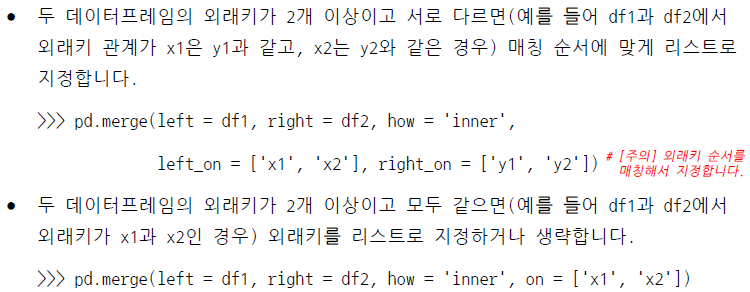

### 외부 파일로 저장

In [ ]:
# apt를 xlsx 파일로 저장합니다.
%time apt.to_excel(excel_writer = 'APT_List_Seoul_2021.xlsx', index = None)
# xlsx 파일을 저장할 때 가장 오래 걸립니다.

In [ ]:
# apt를 csv 파일로 저장합니다.
%time apt.to_csv(path_or_buf = 'APT_List_Seoul_2021.csv', index = None)

In [ ]:
# apt를 z 파일로 저장합니다.
%time joblib.dump(value = apt, filename = 'APT_List_Seoul_2021.z')

## End of Document